## Predicting Survival on the Titanic using Logistic Regression

Building a logistic regression classifier to predict survival on the titanic.   

My model will use the independent variables 'Sex', 'Age', 'Pclass', 'Ticket' and 'Embarked' to predict the dependent variable "Survived".  

###Data Prep
Let me start with some data prep to get data ready to be used in a model

In [5]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
#reading the data from the disk into memory
df = pd.read_csv("/Users/SalmanKhan/Downloads/570 Data Science/Lab3/train.csv")

In [7]:
#here are all the column names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
#I'm going to create a new dataframe and put 6 variables I'm going to be using into it.
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['pclass']=df['Pclass']
X['embarked']=df['Embarked']
X['survived'] = df['Survived']
X['ticket']=df['Ticket']

In [9]:
#I'm going to drop missing values.   
X = X.dropna(axis=0)

In [10]:
#survived will be my dependent variable, y.   I'll assign it to y and remove it from X
y = X['survived']
X = X.drop(['survived'], axis=1)

In [11]:
# We need to handle Sex such that it's categorical, for logistic regression.
# Currently it's a string
#We can use pandas get_dummies to implement one hot encoding.
pd.get_dummies(X.sex)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
6,0,1
7,0,1
8,1,0
9,1,0
10,1,0


In [12]:
#it's important to drop one category
#Otherwise we'll have two perfectly collinear variables.
X['sex'] = pd.get_dummies(X.sex)['female']

In [13]:
#Simiral to 'Sex' variable 'pclass' is also categorical variable with 1, 2, 3 as three diffrent classes.
#We will implement one hot encoding
pd.get_dummies(X.pclass, prefix='pclass')

,pclass_1,pclass_2,pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
6,1,0,0
7,0,0,1
8,0,0,1
9,0,1,0
10,0,0,1


In [14]:
#We will join our original dataset with new columns that we got from one hot encoding.
X = X.join(pd.get_dummies(df.Pclass, prefix='pclass'))

In [15]:
#it's important to drop one category
X = X.drop(['pclass_1', 'pclass'], axis=1)

In [16]:
#Simiral to 'Sex' variable 'Embarked' is also categorical variable with C, Q, S as three diffrent cities.
#So implement one hot encoding
pd.get_dummies(X.embarked, prefix='embarked')

,embarked_C,embarked_Q,embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0
10,0,0,1


In [17]:
#We will join our original dataset with new columns that we got from one hot encoding.
X = X.join(pd.get_dummies(df.Embarked, prefix='embarked'))

In [18]:
#it's important to drop one category
X = X.drop(['embarked_C', 'embarked'], axis=1)

In [19]:
#Similarly, ticket is also categorical so one hot encoding is done
pd.get_dummies(X.ticket, prefix='ticket')

,ticket_110152,ticket_110413,ticket_110465,ticket_110564,ticket_110813,ticket_111240,ticket_111320,ticket_111361,ticket_111369,ticket_111426,...,ticket_STON/O2. 3101282,ticket_STON/O2. 3101283,ticket_STON/O2. 3101290,ticket_SW/PP 751,ticket_W./C. 14258,ticket_W./C. 14263,ticket_W./C. 6608,ticket_W.E.P. 5734,ticket_W/C 14208,ticket_WE/P 5735
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X = X.join(pd.get_dummies(df.Ticket, prefix='ticket'))

In [21]:
X = X.drop(['ticket_110152', 'ticket'], axis=1)

In [22]:
#scaling our features.
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

/Users/SalmanKhan/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
#build test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Creation
At this point I have a test and train set defined.  I will use train to train my model and test to see how accurate the model is.

There's one problem with that though.   Lets say my model is right 70% of the time.   Is that good?  Maybe?   

I'm going to build a simple 'base rate' model to compare my logistic model to, so we can see if our logistic model is useful or not.  

Then, I'll build my logistic model.


####Base Rate Model
For my baserate model, I'm going to predict that everyone dies.

In [24]:
#This function looks for females in the test set and returns 1, survived, otherwise it returns 0
def base_rate_model(X):
    y = np.zeros(X.shape[0])
    return y

In [25]:
#how accurate is my base rate model?
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print ("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.56


<B>So, our base model is 56% correct, lets see if logistic can beat it.

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

In [27]:
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test)))

Logistic accuracy is 0.83


### Model Comparison

Our base model wasn't very good, but it looked better than it was because of class imbalance.  There are many more 0s than 1s in our dataset, so if we just guess 0 we can 'cheat.'

A better metric for binary classifer comparisons is AUC or area under the curve. 

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [35]:
print ("---Base Model---")
#base rate AUC
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print ("Base Rate AUC = %2.2f" % base_roc_auc)
print (classification_report(y_test,base_rate_model(X_test) ))
print ("\n\n---Logistic Model---")
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print (classification_report(y_test, model.predict(X_test) ))

---Base Model---
Base Rate AUC = 0.50
             precision    recall  f1-score   support

          0       0.56      1.00      0.72        80
          1       0.00      0.00      0.00        63

avg / total       0.31      0.56      0.40       143



---Logistic Model---
Logistic AUC = 0.82
             precision    recall  f1-score   support

          0       0.83      0.89      0.86        80
          1       0.84      0.76      0.80        63

avg / total       0.83      0.83      0.83       143



/Users/SalmanKhan/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

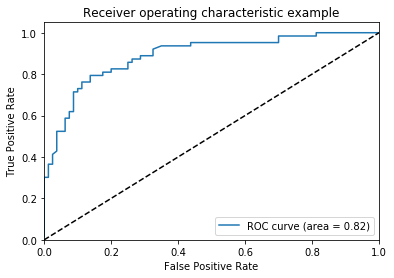

In [37]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

###Our Logistic reggression is 83% correct with AUC 0.82